Zomato Data Analysis Project

Step 1:- Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Step 2:- Create the Data Frame

In [3]:
dataframe= pd.read_csv("Zomato data  (1).csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step 3:- Data Cleaning
Convert  the data type of column -rate

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value =value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
# check null and missing value
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Task1:- Types of resturant

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


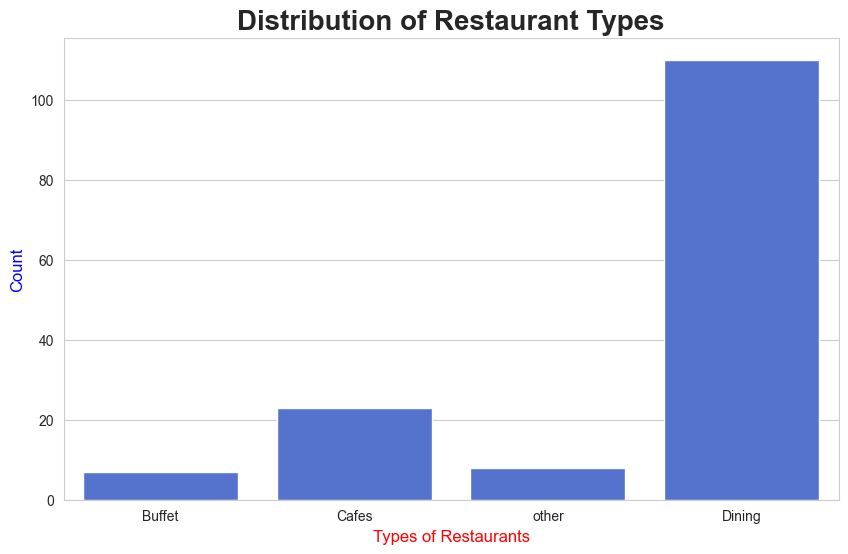

In [33]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot with a modern style
sns.set_style("whitegrid")
sns.countplot(x=dataframe["listed_in(type)"],color="royalblue")

# Improve labels and title
plt.xlabel("Types of Restaurants", fontsize=12,color="red")
plt.ylabel("Count", fontsize=12, color="blue")
plt.title("Distribution of Restaurant Types", fontsize=14, fontweight='bold',size=20)

# Show the plot
plt.show()

So, the conclusion is majority of the resturant falls in dinning category

Task2:- Voting according to resturant type

Text(0, 0.5, 'Votes')

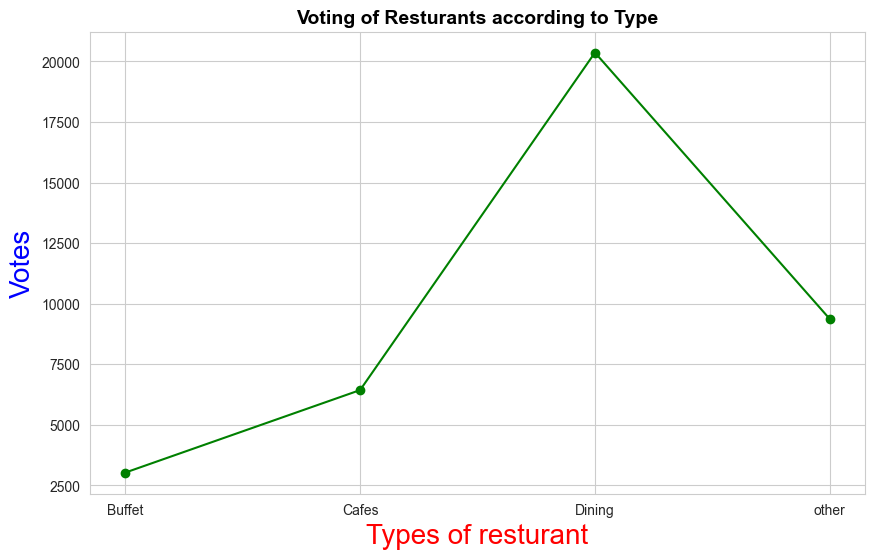

In [88]:
plt.figure(figsize=(10, 6))
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='green', marker='o')
plt.title("Voting of Resturants according to Type",fontweight="bold",fontsize=14,color="black")
plt.xlabel("Types of resturant",c="red", size=20)
plt.ylabel("Votes", c="blue", size=20)

Conclusion- Dining restaurant has recieved maximum votes

Task3:- Finding Rating of majority restaurant

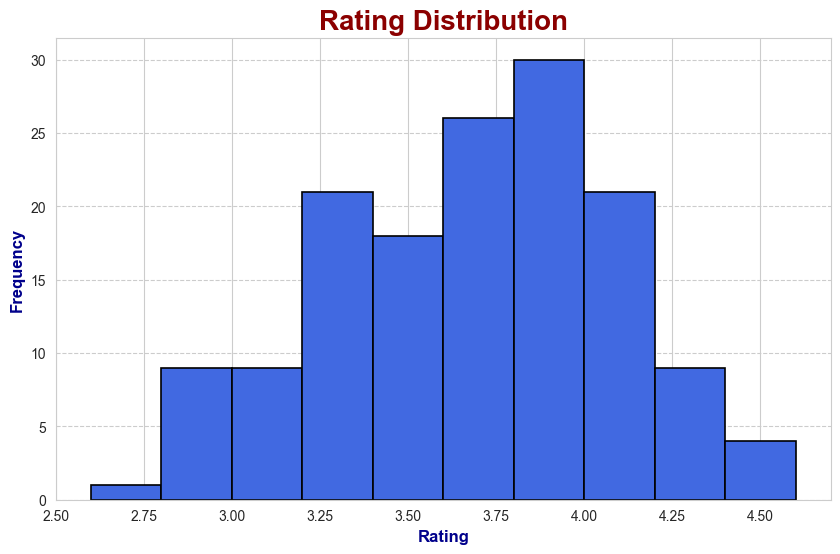

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(dataframe["rate"], bins =10,linewidth=1.2,color="royalblue",edgecolor="black")
plt.title("Rating Distribution",size=20,color='darkred',fontweight='bold')
plt.xlabel("Rating", fontsize=12,fontweight="bold",color="darkblue")
plt.ylabel("Frequency", fontsize=12,fontweight="bold",color="darkblue")
plt.grid(axis="y", linestyle="--")
plt.show()


Conclusion- the majority resturants recieved rating from 3.75 to 4

Step4:- Average spending amount by couples

In [11]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


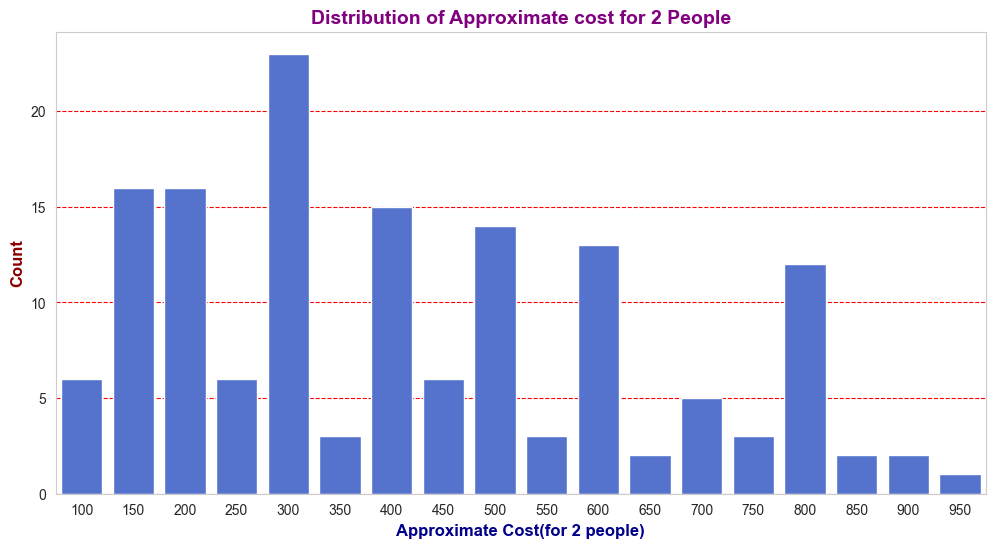

In [44]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,color="royalblue")
plt.title("Distribution of Approximate cost for 2 People",fontsize=14,fontweight="bold",color="purple")
plt.xlabel("Approximate Cost(for 2 people)",fontsize=12,fontweight="bold",color="darkblue")
plt.ylabel("Count",fontsize=12,fontweight="bold",color="darkred")
plt.grid(axis="y", linestyle="--",color="red")
plt.show()

Conclusion- the majority of couple preferr resturants with  an approximate cost of 300 rupees

Step5:- Which mode receives maximum rating

In [13]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Rating')

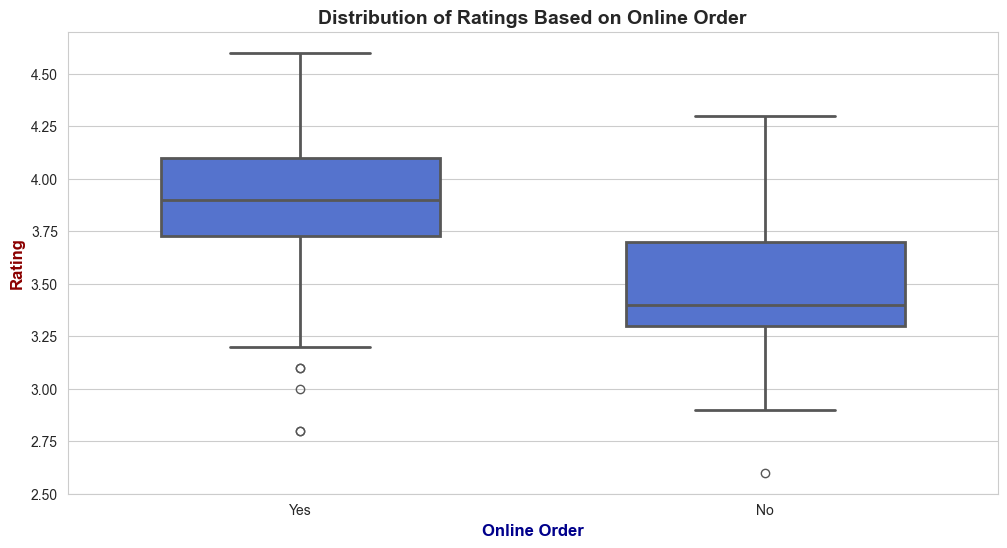

In [64]:
plt.figure(figsize =(12,6))
sns.boxplot(x = 'online_order',y= 'rate', data= dataframe,color="royalblue",linewidth=2,width=0.6)
plt.title("Distribution of Ratings Based on Online Order",fontweight="bold",fontsize=14)
plt.xlabel("Online Order",fontsize=12,fontweight="bold",color="darkblue")
plt.ylabel("Rating",fontsize=12,fontweight="bold",color="darkred")

Conclusion- Offline_order received lower rating in comparison to Online_order 

Step6:- which type of restaurant received more offline order 

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


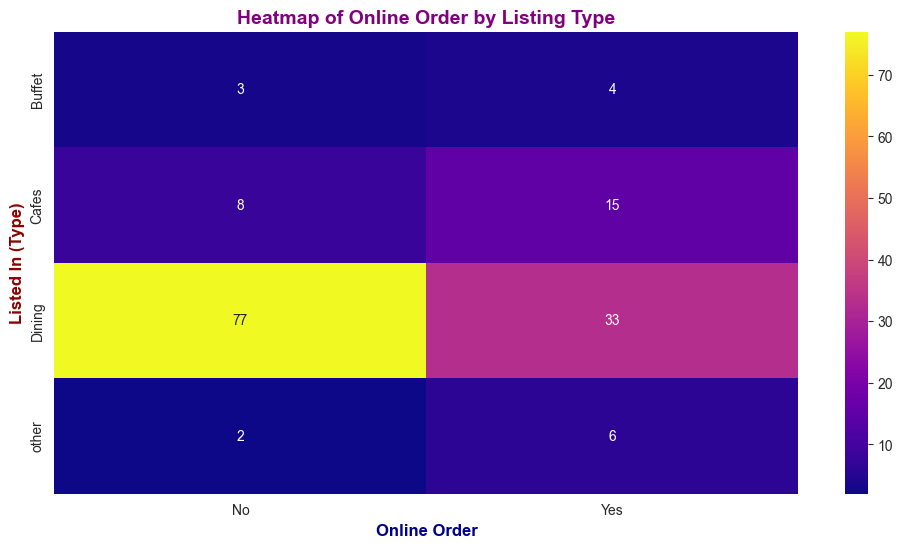

In [82]:
plt.figure(figsize=(12,6))
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="plasma",fmt='d')
plt.title("Heatmap of Online Order by Listing Type",fontsize=14,fontweight="bold",color="purple")
plt.xlabel("Online Order",fontsize=12,fontweight="bold",color="darkblue")
plt.ylabel("Listed In (Type)",fontsize=12,fontweight="bold",color="darkred")
plt.show()

CONCLUSION:- Dining Resturants Primarily accept offline order, wheareas cafe primarily receive online orders,This suggest that clients prefer to order in person at resturants, but prefer online ordering at cafes.